In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

data_path = "../Dataset/train.csv"
df = pd.read_csv(data_path)

df.head()


/var/folders/b6/6b1jyj0d7q178wx0gfsd0qw80000gn/T/ipykernel_12873/3182516783.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [19]:
#Basic information about the dataset
df.shape, df.dtypes


((100000, 28),
 ID                           object
 Customer_ID                  object
 Month                        object
 Name                         object
 Age                          object
 SSN                          object
 Occupation                   object
 Annual_Income                object
 Monthly_Inhand_Salary       float64
 Num_Bank_Accounts             int64
 Num_Credit_Card               int64
 Interest_Rate                 int64
 Num_of_Loan                  object
 Type_of_Loan                 object
 Delay_from_due_date           int64
 Num_of_Delayed_Payment       object
 Changed_Credit_Limit         object
 Num_Credit_Inquiries        float64
 Credit_Mix                   object
 Outstanding_Debt             object
 Credit_Utilization_Ratio    float64
 Credit_History_Age           object
 Payment_of_Min_Amount        object
 Total_EMI_per_month         float64
 Amount_invested_monthly      object
 Payment_Behaviour            object
 Monthly_Balance       

In [34]:
def detect_variable_types(df, target_col=None):
    """Automatically detect variable types in a DataFrame"""
    types = {}
    
    for col in df.columns:
        if col == target_col:
            types[col] = 'target'
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            types[col] = 'datetime'
        elif pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() == 2:
                types[col] = 'binary'
            else:
                types[col] = 'numerical'
        elif df[col].nunique() < 20:
            types[col] = 'categorical'
        elif df[col].dtype == 'object':
            avg_length = df[col].astype(str).str.len().mean()
            if avg_length > 50:
                types[col] = 'text'
            else:
                types[col] = 'categorical'
    return types

print(detect_variable_types(df, None))

{'ID': 'categorical', 'Customer_ID': 'categorical', 'Month': 'categorical', 'Name': 'categorical', 'Age': 'categorical', 'SSN': 'categorical', 'Occupation': 'categorical', 'Annual_Income': 'categorical', 'Monthly_Inhand_Salary': 'numerical', 'Num_Bank_Accounts': 'numerical', 'Num_Credit_Card': 'numerical', 'Interest_Rate': 'numerical', 'Num_of_Loan': 'categorical', 'Type_of_Loan': 'text', 'Delay_from_due_date': 'numerical', 'Num_of_Delayed_Payment': 'categorical', 'Changed_Credit_Limit': 'categorical', 'Num_Credit_Inquiries': 'numerical', 'Credit_Mix': 'categorical', 'Outstanding_Debt': 'categorical', 'Credit_Utilization_Ratio': 'numerical', 'Credit_History_Age': 'categorical', 'Payment_of_Min_Amount': 'categorical', 'Total_EMI_per_month': 'numerical', 'Amount_invested_monthly': 'categorical', 'Payment_Behaviour': 'categorical', 'Monthly_Balance': 'categorical', 'Credit_Score': 'categorical'}


In [44]:
def quick_missing_analysis(df):
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    
    print("Missing Value Summary:")
    for col in df.columns:
        if missing_counts[col] > 0:
            print(f"  {col}: {missing_counts[col]} missing ({missing_percent[col]:.1f}%)")

print(quick_missing_analysis(df))

Missing Value Summary:
  Name: 9985 missing (10.0%)
  Monthly_Inhand_Salary: 15002 missing (15.0%)
  Type_of_Loan: 11408 missing (11.4%)
  Num_of_Delayed_Payment: 7002 missing (7.0%)
  Num_Credit_Inquiries: 1965 missing (2.0%)
  Credit_History_Age: 9030 missing (9.0%)
  Amount_invested_monthly: 4479 missing (4.5%)
  Monthly_Balance: 1200 missing (1.2%)
None


In [53]:
# Quick sanity checks for numerical data
def basic_range_check(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        print(f"{col}: min={df[col].min()}, max={df[col].max()}")
        
        # Flag obviously problematic values
        if col.lower() in ['age'] and (df[col].min() < 0 or df[col].max() > 120):
            print(f"  ⚠️ Suspicious age values detected")

print(basic_range_check(df))

Monthly_Inhand_Salary: min=303.6454166666666, max=15204.633333333331
Num_Bank_Accounts: min=-1, max=1798
Num_Credit_Card: min=0, max=1499
Interest_Rate: min=1, max=5797
Delay_from_due_date: min=-5, max=67
Num_Credit_Inquiries: min=0.0, max=2597.0
Credit_Utilization_Ratio: min=20.0, max=50.00000000000001
Total_EMI_per_month: min=0.0, max=82331.0
None


In [61]:
# Simple z-score outlier detection
def find_zscore_outliers(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = abs((data[column] - mean) / std)
    
    outliers = data[z_scores > threshold]
    print(f"Found {len(outliers)} outliers using Z-score method")
    return outliers

print(find_zscore_outliers(df, "Monthly_Inhand_Salary"))


Found 879 outliers using Z-score method
            ID Customer_ID     Month      Name Age          SSN  Occupation  \
1728    0x2022  CUS_0x2c31   January     Yokog  30  680-06-0631    Musician   
1729    0x2023  CUS_0x2c31  February     Yokog  30  680-06-0631    Musician   
1730    0x2024  CUS_0x2c31     March     Yokog  30  680-06-0631    Musician   
1731    0x2025  CUS_0x2c31     April     Yokog  30  680-06-0631    Musician   
1732    0x2026  CUS_0x2c31       May     Yokog  30  680-06-0631    Musician   
...        ...         ...       ...       ...  ..          ...         ...   
98931  0x259ad  CUS_0x1f97     April  Hitoshio  49  346-14-6418  Journalist   
98932  0x259ae  CUS_0x1f97       May       NaN  49  346-14-6418  Journalist   
98933  0x259af  CUS_0x1f97      June  Hitoshio  49  346-14-6418  Journalist   
98934  0x259b0  CUS_0x1f97      July  Hitoshio  49  346-14-6418  Journalist   
98935  0x259b1  CUS_0x1f97    August  Hitoshio  50  346-14-6418  Journalist   

      Annua

In [62]:
#Missing Values
df.isna().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

In [63]:
# Target distribution (adjust target name)
target_col = "Credit_Score"
df[target_col].value_counts(normalize=True)


Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

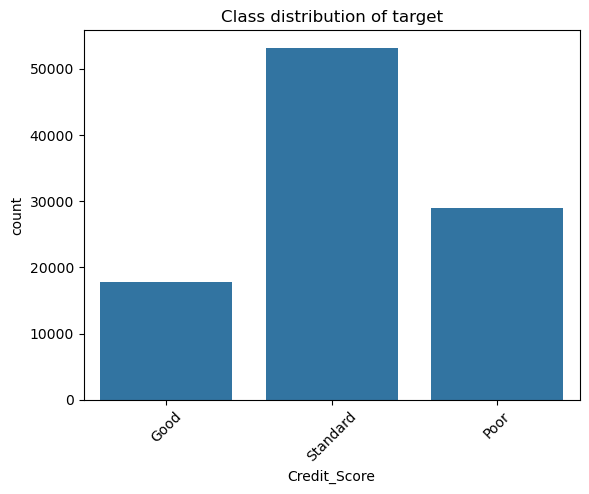

In [64]:
# Plot class balance
sns.countplot(x=target_col, data=df)
plt.title("Class distribution of target")
plt.xticks(rotation=45)
plt.show()


In [65]:
# Numeric feature distributions
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

df[numeric_cols].describe()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


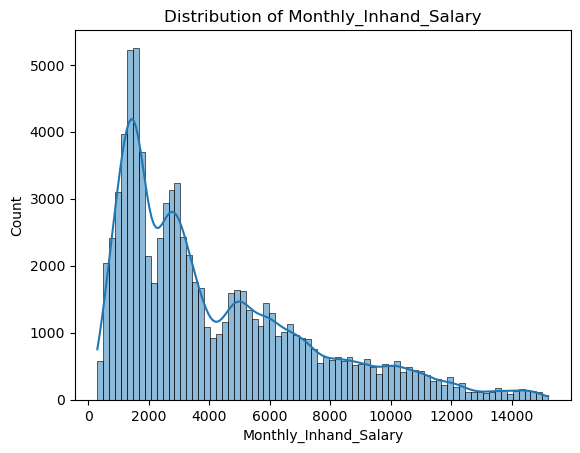

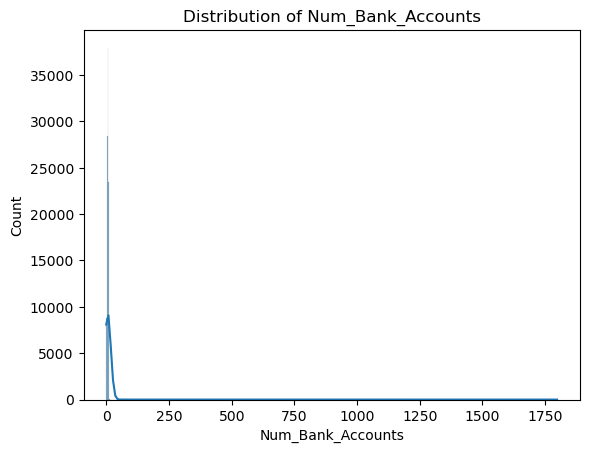

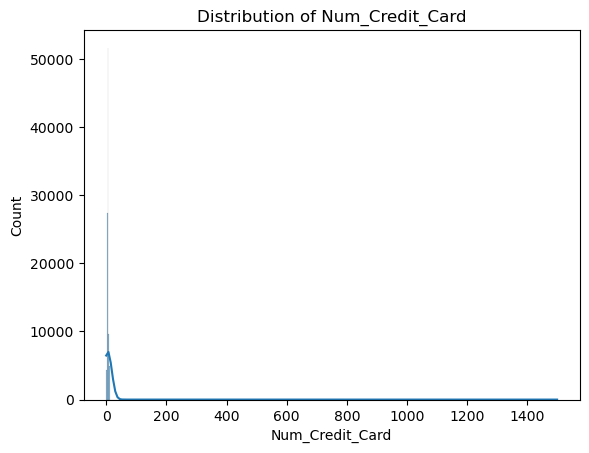

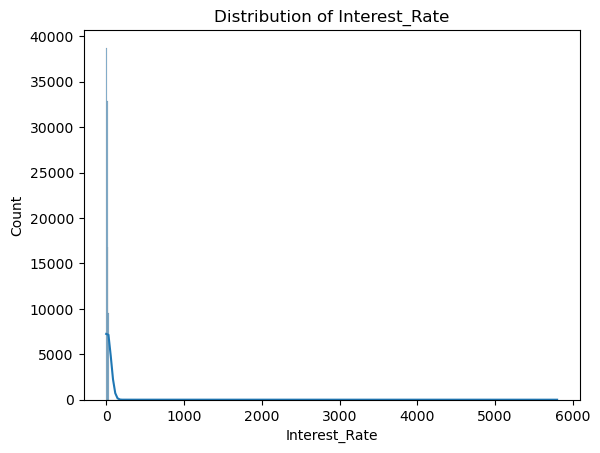

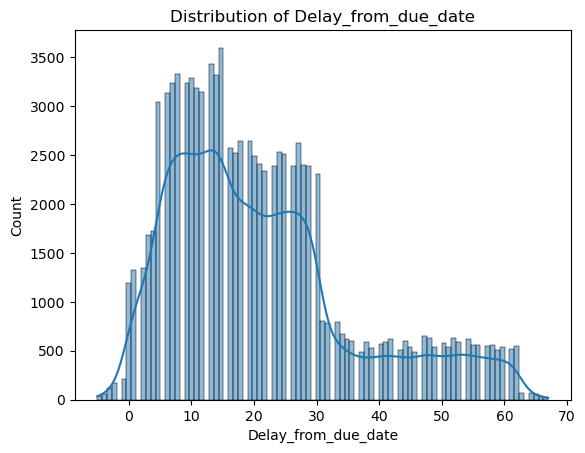

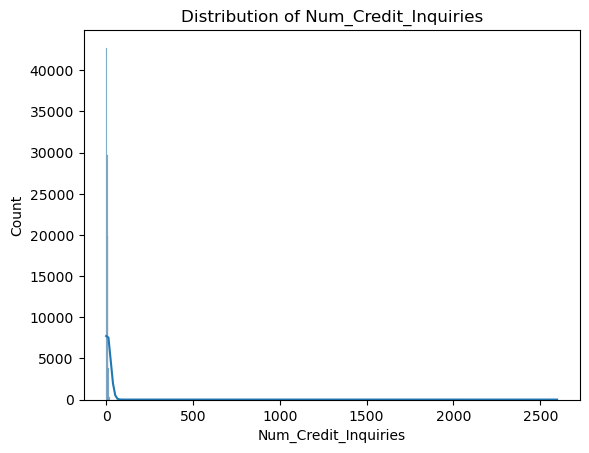

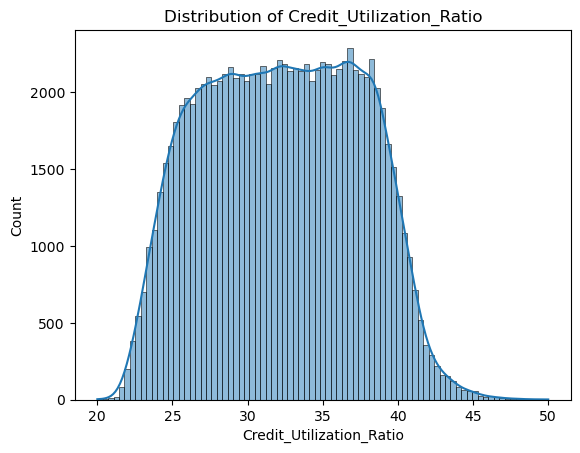

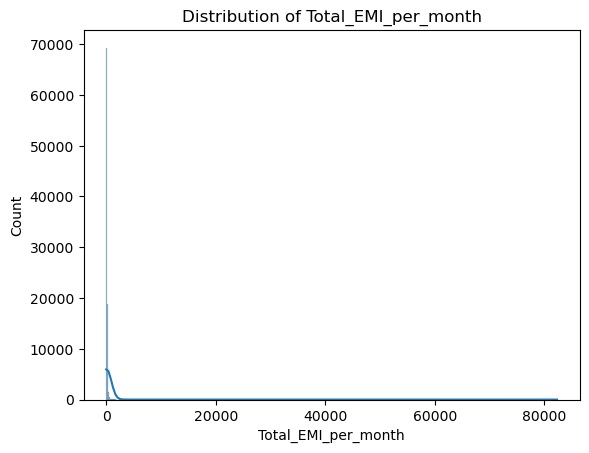

In [66]:
# Example: histogram of a numeric feature
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


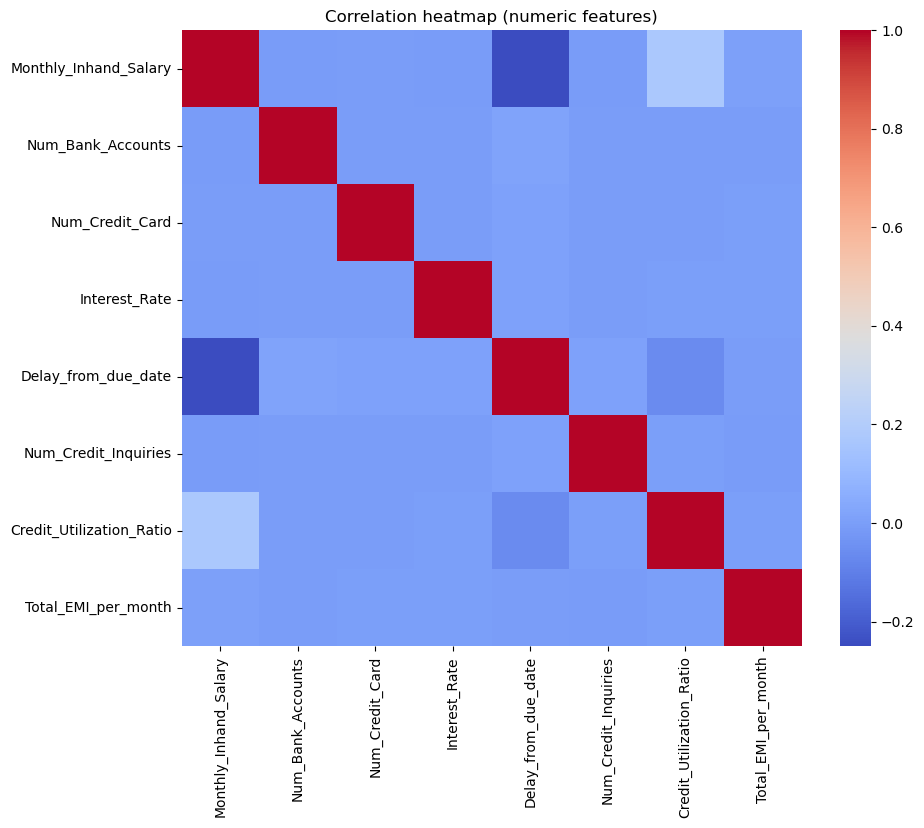

In [67]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation heatmap (numeric features)")
plt.show()
